In [1]:
!pip install tensorflow tensorflow_datasets matplotlib


  Using cached tensorflow_datasets-4.9.9-py3-none-any.whl.metadata (11 kB)
  Using cached dm_tree-0.1.9-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached etils-1.12.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached immutabledict-4.2.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached simple_parsing-0.1.7-py3-none-any.whl.metadata (7.3 kB)
  Using cached tensorflow_metadata-1.17.2-py3-none-any.whl.metadata (2.5 kB)
  Using cached einops-0.8.1-py3-none-any.whl.metadata (13 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
  Using cached googleapis_common_protos-1.70.0-py3-none-any.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
(train_ds, val_ds), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess: Resize + Normalize
def preprocess(image, label):
    image = tf.image.resize(image, (180, 180))
    image = image / 255.0
    return image, label

train_ds = train_ds.map(preprocess).batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\macha\tensorflow_datasets\tf_flowers\incomplete.CFCR7P_3.0.1\tf_flowers-train.tfrecord*...:…

Dataset tf_flowers downloaded and prepared to C:\Users\macha\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(5, activation='softmax')  # 5 flower classes
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


C:\Users\macha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,647,621 (25.36 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.3368 - loss: 1.5793 - val_accuracy: 0.5749 - val_loss: 1.0892
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1863s 20s/step - accuracy: 0.5708 - loss: 1.0788 - val_accuracy: 0.6185 - val_loss: 0.9828
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.6463 - loss: 0.9171 - val_accuracy: 0.6308 - val_loss: 0.9172
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.7113 - loss: 0.7557 - val_accuracy: 0.6553 - val_loss: 0.8865
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7766 - loss: 0.5959 - val_accuracy: 0.6826 - val_loss: 0.9126
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8375 - loss: 0.4213 - val_accuracy: 0.6717 - val_loss: 0.9618
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step - accuracy: 0.9061 - loss: 0.2790 - val_accuracy: 0.6744 - val_loss: 1.0948
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step - accuracy: 0.9393 - loss: 0.1921 - val_accuracy: 0.6213 -

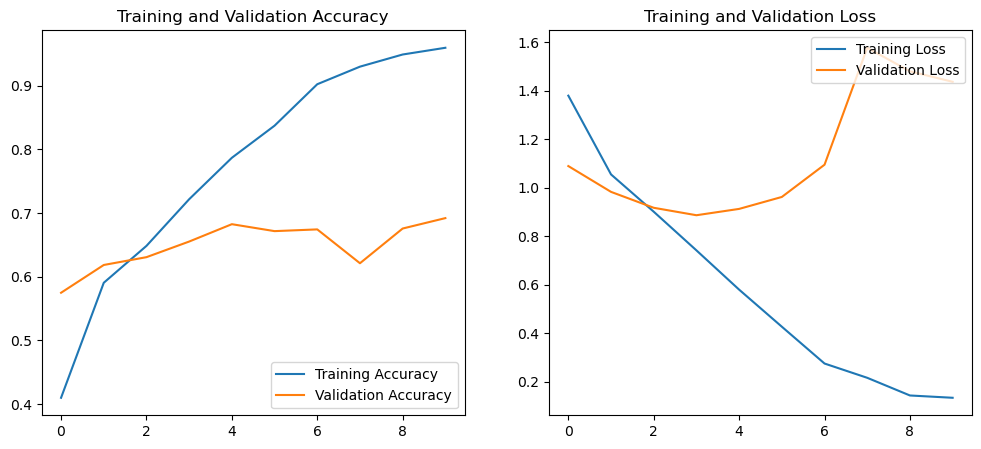

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [6]:
model.save('flower_model.h5')
